# Prosper Loan Dataset Exploration
## by Arjun Adhikari


> In this project, I will be investigating the Prosper Loan Dataset. This dataset contains records of Loans made by Prosper during the time frame of 2008-2014. The dataset contains 100,000+ entries, and has several categories. My main interest is to understand what factors affect the loan amount and Interest Rates. 

>To examine dataset, first I will perform some preliminary data wrangling to clean the dataset, next, I will perform Univariate, Bivariate, and finally Multivariate Data exploration to draw conclusions from this dataset. 

In [482]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [538]:
df = pd.read_csv('prosperLoanData.csv')

In [539]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [485]:
df.shape

(113937, 81)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> The dataset has 113937 rows and 81 columns. There are several numerical values such as income, APR etc, which would be good for bivariate analysis, and several categorial values, such as loan status, which would be good for univariable analysis. 

### What is/are the main feature(s) of interest in your dataset?

> This is a financial dataset about loans. There are several data regarding the financial health of the borrower such as CreditGrade, Income, etc. 
> There is also information on the term of loan, APR, status, ratings, loan amount, etc. 
>It would be interesting to see the relationship between these variables. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since the dataset is about loans, I believe that it will be most important to understand what features dictate the loan amount and the loan APR. The most important metrics would be 
1. CreditScore
2. ProsperRating
3. IncomeRange
4. Employment Status

>It will also be interesting to see if the Location of Type of Loan can affect the LoanAmount or APR

## Data Wrangling

In [540]:
#Change the ListingCreationDate to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [541]:
#81 different variables are a lot, and I will only explore a selected variables that should affect the APR and LoanAmount

df_new = df[['ListingKey',                            
'ListingNumber',                         
'ListingCreationDate',                    
'LoanStatus',
'BorrowerAPR',
'LoanOriginalAmount',
'StatedMonthlyIncome',                               
'TotalInquiries',  'MonthlyLoanPayment',                                                                                               
'BankcardUtilization',                   
'AvailableBankcardCredit', 'ProsperRating (numeric)','ListingCategory (numeric)', 'ProsperScore', 'DebtToIncomeRatio', 'CreditScoreRangeUpper','Term',
'Investors','LoanNumber','TotalTrades','IncomeVerifiable','IncomeRange','EmploymentStatus', 'Occupation','BorrowerState']].copy()

In [675]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
ListingKey                   113937 non-null object
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null datetime64[ns]
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
LoanOriginalAmount           113937 non-null int64
StatedMonthlyIncome          113937 non-null float64
TotalInquiries               112778 non-null float64
MonthlyLoanPayment           113937 non-null float64
BankcardUtilization          106333 non-null float64
AvailableBankcardCredit      106393 non-null float64
ProsperRating (numeric)      84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
ProsperScore                 84853 non-null float64
DebtToIncomeRatio            105383 non-null float64
CreditScoreRangeUpper        113346 non-null float64
Term                         113937 non-null

There are rows with Nans. There are two possible ways to deal with 
1. Drop or rows
2. Assign a median value

I don't think it's proper to assign a median value randomly, so we will just drop these values 

In [542]:
#Drop the rows with NaN 
df_2 = df_new.dropna()

In [543]:
#Check the new dataframe
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 25 columns):
ListingKey                   76224 non-null object
ListingNumber                76224 non-null int64
ListingCreationDate          76224 non-null datetime64[ns]
LoanStatus                   76224 non-null object
BorrowerAPR                  76224 non-null float64
LoanOriginalAmount           76224 non-null int64
StatedMonthlyIncome          76224 non-null float64
TotalInquiries               76224 non-null float64
MonthlyLoanPayment           76224 non-null float64
BankcardUtilization          76224 non-null float64
AvailableBankcardCredit      76224 non-null float64
ProsperRating (numeric)      76224 non-null float64
ListingCategory (numeric)    76224 non-null int64
ProsperScore                 76224 non-null float64
DebtToIncomeRatio            76224 non-null float64
CreditScoreRangeUpper        76224 non-null float64
Term                         76224 non-null int64
Investors

In [544]:
df_2.describe()

,ListingNumber,BorrowerAPR,LoanOriginalAmount,StatedMonthlyIncome,TotalInquiries,MonthlyLoanPayment,BankcardUtilization,AvailableBankcardCredit,ProsperRating (numeric),ListingCategory (numeric),ProsperScore,DebtToIncomeRatio,CreditScoreRangeUpper,Term,Investors,LoanNumber,TotalTrades
count,7.622400e+04,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000
mean,7.737262e+05,0.223904,9294.811018,6003.001652,4.344367,296.417166,0.568307,11168.459107,4.132360,3.302372,6.080250,0.258041,718.271883,42.760076,70.001404,86625.350388,24.177647
std,2.344178e+05,0.079374,6413.578876,5110.685475,3.851159,189.677922,0.301111,18223.467198,1.661507,4.396915,2.360641,0.320577,47.280446,11.743734,97.800582,28661.916666,11.616726
min,4.162750e+05,0.045830,1000.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,619.000000,12.000000,1.000000,38045.000000,1.000000
25%,5.603452e+05,0.161570,4000.000000,3583.333333,2.000000,159.040000,0.330000,1115.000000,3.000000,1.000000,4.000000,0.150000,679.000000,36.000000,1.000000,61333.750000,16.000000
50%,7.425040e+05,0.215660,8000.000000,5041.666667,3.000000,257.720000,0.610000,4496.500000,4.000000,1.000000,6.000000,0.220000,719.000000,36.000000,32.000000,88081.500000,23.000000
75%,9.747022e+05,0.287800,14603.250000,7250.000000,6.000000,392.420000,0.830000,13585.250000,5.000000,3.000000,8.000000,0.320000,739.000000,60.000000,100.000000,108664.750000,31.000000
max,1.255149e+06,0.423950,35000.000000,483333.333333,78.000000,2251.510000,2.500000,498374.000000,7.000000,20.000000,11.000000,10.010000,899.000000,60.000000,1189.000000,136486.000000,122.000000


In [545]:
#Threshold the income
#The stated monthly income has a small number of outliers, so we will threshold it

df_2['StatedMonthlyIncome'] = df_2['StatedMonthlyIncome'].clip(0,30000)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [546]:
#Get the year of the loan from the date
df_2['year'] = df_2['ListingCreationDate'].dt.year;

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [547]:
#Combine all the different past_dues into one because otherwise there will be too many to plot on a single graph

x = dict.fromkeys(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)','Past Due (>120 days)'], 'PastDue')

df_2 = df_2.replace(x)

In [548]:
#Check if the above work
df_2.LoanStatus.unique()

array(['Current', 'PastDue', 'Defaulted', 'Completed', 'Chargedoff',
       'FinalPaymentInProgress'], dtype=object)

In [549]:
df_2.head()

,ListingKey,ListingNumber,ListingCreationDate,LoanStatus,BorrowerAPR,LoanOriginalAmount,StatedMonthlyIncome,TotalInquiries,MonthlyLoanPayment,BankcardUtilization,...,Term,Investors,LoanNumber,TotalTrades,IncomeVerifiable,IncomeRange,EmploymentStatus,Occupation,BorrowerState,year
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,Current,0.12016,10000,6125.000000,5.0,318.93,0.21,...,36,1,134815,29.0,True,"$50,000-74,999",Employed,Professional,CO,2014
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,Current,0.12528,10000,2875.000000,1.0,321.45,0.04,...,36,158,77296,26.0,True,"$25,000-49,999",Employed,Skilled Labor,GA,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,Current,0.24614,15000,9583.333333,9.0,563.97,0.81,...,36,20,102670,39.0,True,"$100,000+",Employed,Executive,MN,2013
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,Current,0.15425,15000,8333.333333,2.0,342.37,0.39,...,60,1,123257,47.0,True,"$100,000+",Employed,Professional,NM,2013
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,Current,0.31032,3000,2083.333333,0.0,122.67,0.72,...,36,1,88353,16.0,True,"$25,000-49,999",Employed,Sales - Retail,KS,2013


In [550]:
df_2.describe()

,ListingNumber,BorrowerAPR,LoanOriginalAmount,StatedMonthlyIncome,TotalInquiries,MonthlyLoanPayment,BankcardUtilization,AvailableBankcardCredit,ProsperRating (numeric),ListingCategory (numeric),ProsperScore,DebtToIncomeRatio,CreditScoreRangeUpper,Term,Investors,LoanNumber,TotalTrades,year
count,7.622400e+04,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000
mean,7.737262e+05,0.223904,9294.811018,5947.820458,4.344367,296.417166,0.568307,11168.459107,4.132360,3.302372,6.080250,0.258041,718.271883,42.760076,70.001404,86625.350388,24.177647,2012.333543
std,2.344178e+05,0.079374,6413.578876,3661.091855,3.851159,189.677922,0.301111,18223.467198,1.661507,4.396915,2.360641,0.320577,47.280446,11.743734,97.800582,28661.916666,11.616726,1.194943
min,4.162750e+05,0.045830,1000.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,619.000000,12.000000,1.000000,38045.000000,1.000000,2009.000000
25%,5.603452e+05,0.161570,4000.000000,3583.333333,2.000000,159.040000,0.330000,1115.000000,3.000000,1.000000,4.000000,0.150000,679.000000,36.000000,1.000000,61333.750000,16.000000,2012.000000
50%,7.425040e+05,0.215660,8000.000000,5041.666667,3.000000,257.720000,0.610000,4496.500000,4.000000,1.000000,6.000000,0.220000,719.000000,36.000000,32.000000,88081.500000,23.000000,2013.000000
75%,9.747022e+05,0.287800,14603.250000,7250.000000,6.000000,392.420000,0.830000,13585.250000,5.000000,3.000000,8.000000,0.320000,739.000000,60.000000,100.000000,108664.750000,31.000000,2013.000000
max,1.255149e+06,0.423950,35000.000000,30000.000000,78.000000,2251.510000,2.500000,498374.000000,7.000000,20.000000,11.000000,10.010000,899.000000,60.000000,1189.000000,136486.000000,122.000000,2014.000000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Numeric Variables

>First I will start with the numeric variables and look at the effect of time (year)


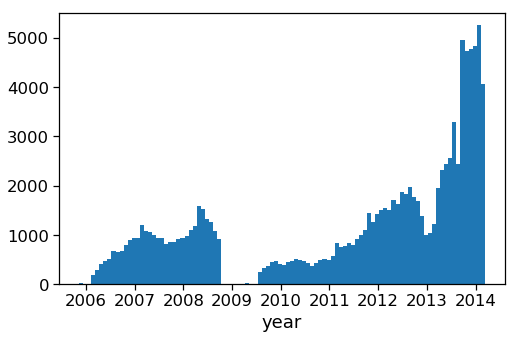

In [182]:
#Let's first look at the loan listing creation date
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'ListingCreationDate', bins = 100)
plt.xlabel('year', fontsize=18)

plt.show()

__There are two very important observations here__
> There were nearly no loans around 2009

> There were a really large number of loans in 2014, with an exponential increase between 2010 and 2014

> __This is because there was the market crash in 2009, followed by an improving economy since 2010.__ 

__Let's look at six different numeric variables, and explore their distributions__
1. 'StatedMonthlyIncome'
2. 'BorrowerAPR'
3. 'AvailableBankcardCredit'
4. 'CreditScoreRangeUpper'
5. 'TotalInquiries'
6. 'LoanOriginalAmount'

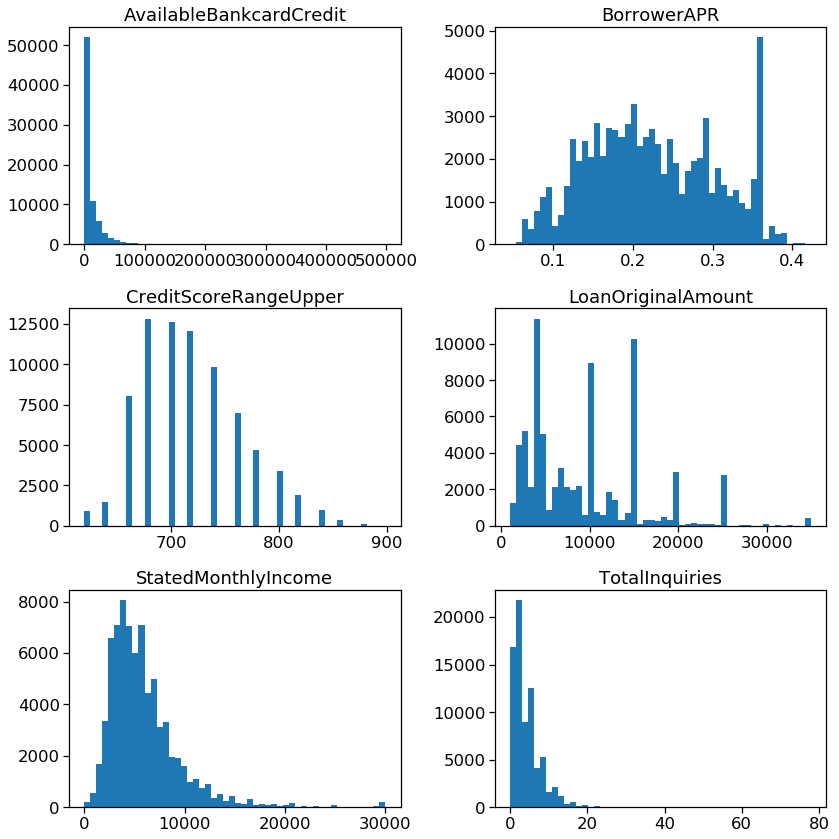

In [554]:
#Plot a histogram for the following variables 
df_2.hist(column = ['StatedMonthlyIncome','BorrowerAPR','AvailableBankcardCredit','CreditScoreRangeUpper','TotalInquiries','LoanOriginalAmount'],bins = 50,grid=False, figsize = (12,12));
plt.tight_layout()

__Observations__

> APR and Credit Score are normally distributed
> CreditScore is not continuous

> Loan Amount is Randomly distributed

> Available credit, monthly income and Inquiries have a long tail. We will explore these items next in detail. 


__Available Bank Credit__

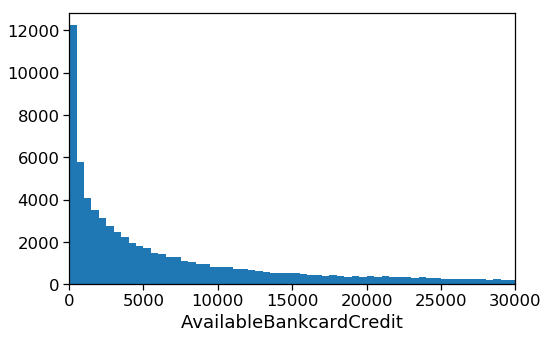

In [555]:
binsize = 500
bins = np.arange(0, df['AvailableBankcardCredit'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2, x = 'AvailableBankcardCredit', bins = bins)
#limit the x-axis
plt.xlim(0,30000)
plt.xlabel('AvailableBankcardCredit')
plt.show()

__Observation - The distribution just has a long time, denoting that most of the borrowers have a very small credit line__ 

__The Monthly Income seems to have a very small number of outliers which are skewing the data. Let's limit the x -axis to focus on the majority of the data__

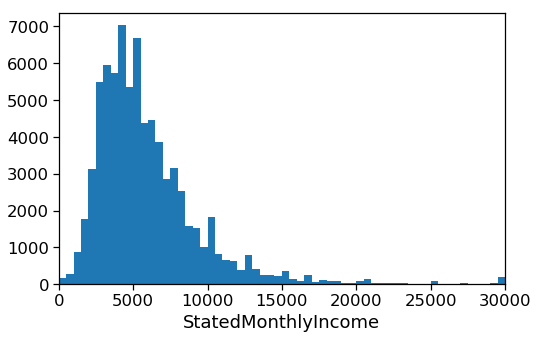

In [559]:
binsize = 500
bins = np.arange(0, df_2['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2, x = 'StatedMonthlyIncome', bins = bins)
#limit the x-axis
plt.xlim(0,30000)
plt.xlabel('StatedMonthlyIncome', fontsize=18)
plt.show()

__Since the distribution has a long tail, let's explore using a log scale on the x-axis__

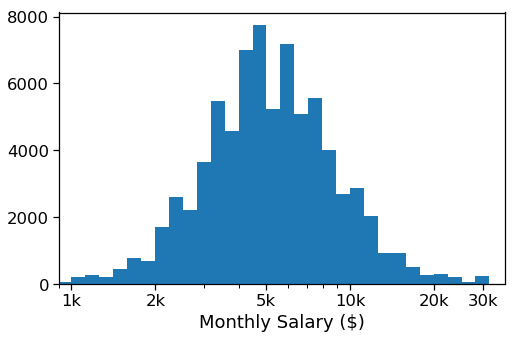

In [560]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df_2['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4], ['1k' , '2k' , '5k', '10k', '20k', '30k'])
plt.xlim(900,36000)
plt.xlabel('Monthly Salary ($)', fontsize=18)
plt.show()

__Here it is clear that the salary is centered around USD 5000, which is about the average American Salary__

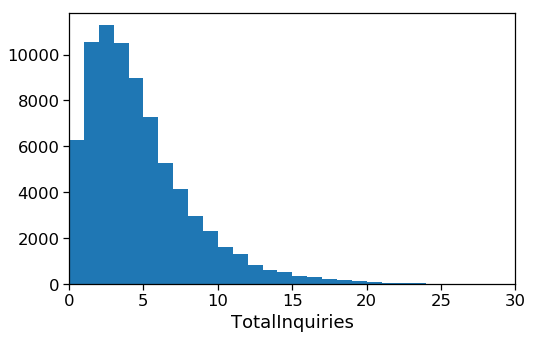

In [561]:
#plot TotalInquiries    
binsize = 1
bins = np.arange(0, df_2['TotalInquiries'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2, x = 'TotalInquiries', bins = bins)
#limit the x-axis
plt.xlim(0,30)
plt.xlabel('TotalInquiries')
plt.show()

__Here is see that there is peak around 3-4 for the total inquiries. Even though this distribution is skewed, it is NOT a good idea to plot it on a semi-log plot, because of several x = 0 values for total inquiries.__

<br>

### Categorical Variables

Next I will look at the categorical variables

__Edit the entries in the ListingCategories__

In [656]:
df_2 = df_2.replace({'ListingCategory (numeric)':{0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}})
                                                                                    

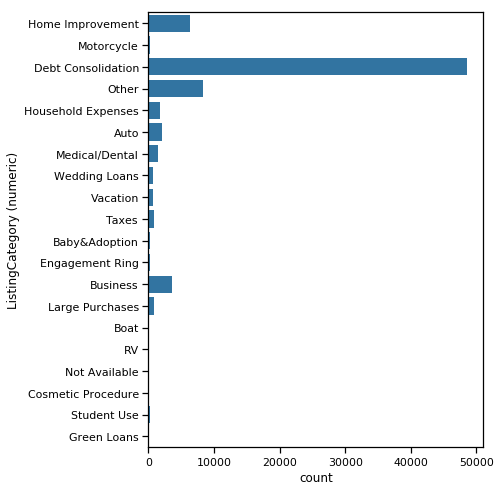

In [658]:
plt.figure(figsize=[6, 8])
sns.countplot(data = df_2, y = 'ListingCategory (numeric)', color = sns.color_palette()[0]);
#plt.xticks(fontsize=16);

__Most loans are  debt consolidation, later on we can check if the loan category can affect interest rates__

__Next, I will explore the counts of the IncomeRange, Loan Status, ProsperScore and EmploymentStatus__

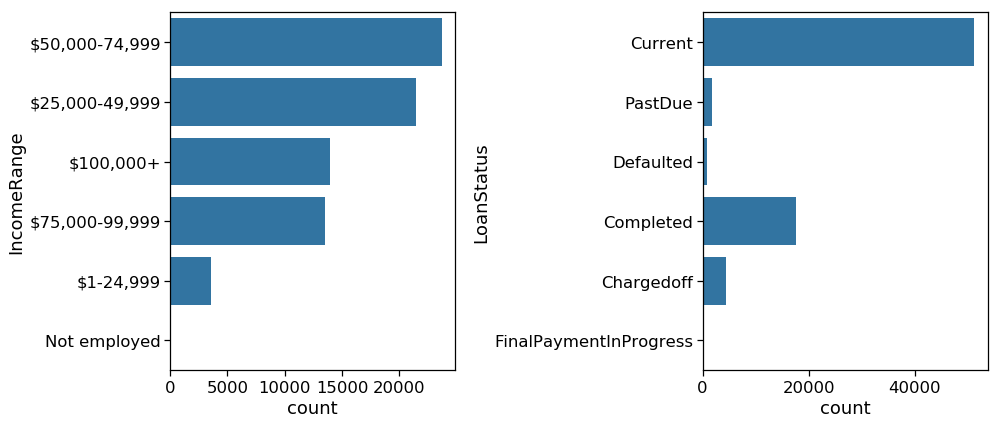

In [511]:
#make subplots
fig, axarr = plt.subplots(1, 2, figsize=(14, 6))

#plot counts for each using the seaborn countplot function
sns.countplot(data = df_2, y = 'IncomeRange',color = sns.color_palette()[0], ax=axarr[0]);
sns.countplot(data = df_2, y = 'LoanStatus',color = sns.color_palette()[0], ax=axarr[1]);
plt.tight_layout()

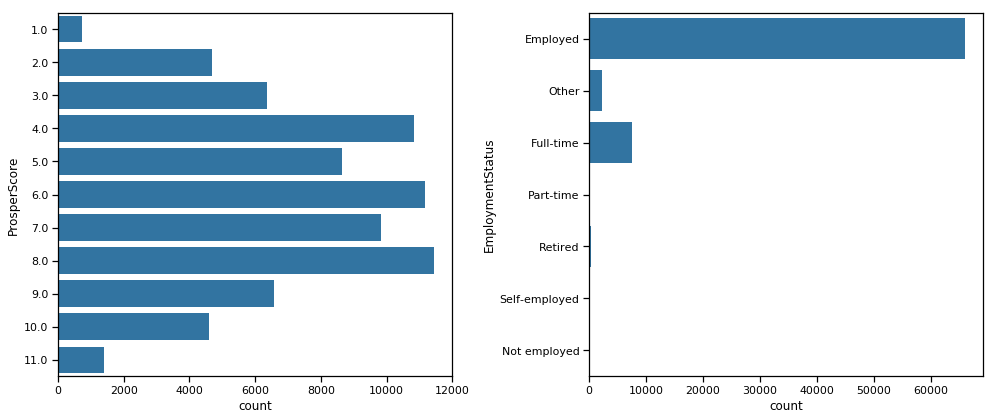

In [659]:
fig, axarr = plt.subplots(1, 2, figsize=(14, 6))

#plot counts for each using the seaborn countplot function
sns.countplot(data = df_2, y = 'ProsperScore',color = sns.color_palette()[0], ax=axarr[0]);
sns.countplot(data = df_2, y = 'EmploymentStatus',color = sns.color_palette()[0], ax=axarr[1]);

plt.tight_layout()

__Observations__
1. $50-75k is the income range with the most counts, and this is also the mean American Income
2. A majority of the loans are current, and there are very few past due loans. 
3. The ProsperScore is normally distributed. So is the APR, and this suggests that there could be a strong correlation between the APR and ProsperScore. 
4. Most of the people with the Loans are employed, therefore one can conclude that being employed definitely boosts you chances of securing a loan

## Bivariate Exploration

__For bivariate analysis, I will look at the variables contained in the df2.__

>These variables are either numeric, or categorial. 

>First I will look at the heatmap of the numerical values to understand whichs factors affect the  __BorrowerAPR and the LoanOriginalAmount__

>Next I will look at categorial variables and their effect on the __BorrowerAPR and the LoanOriginalAmount__

### Correlation Heatmap
__To look at the relationship between the numerical variables, I will use a heatmap of the correlation coefficients__

In [220]:
plot_list = ['BorrowerAPR',
'LoanOriginalAmount',
'StatedMonthlyIncome',                               
'TotalInquiries',                                                                                                 
'BankcardUtilization',                   
'AvailableBankcardCredit', 'ProsperRating (numeric)', 'ProsperScore', 'DebtToIncomeRatio', 'CreditScoreRangeUpper',]

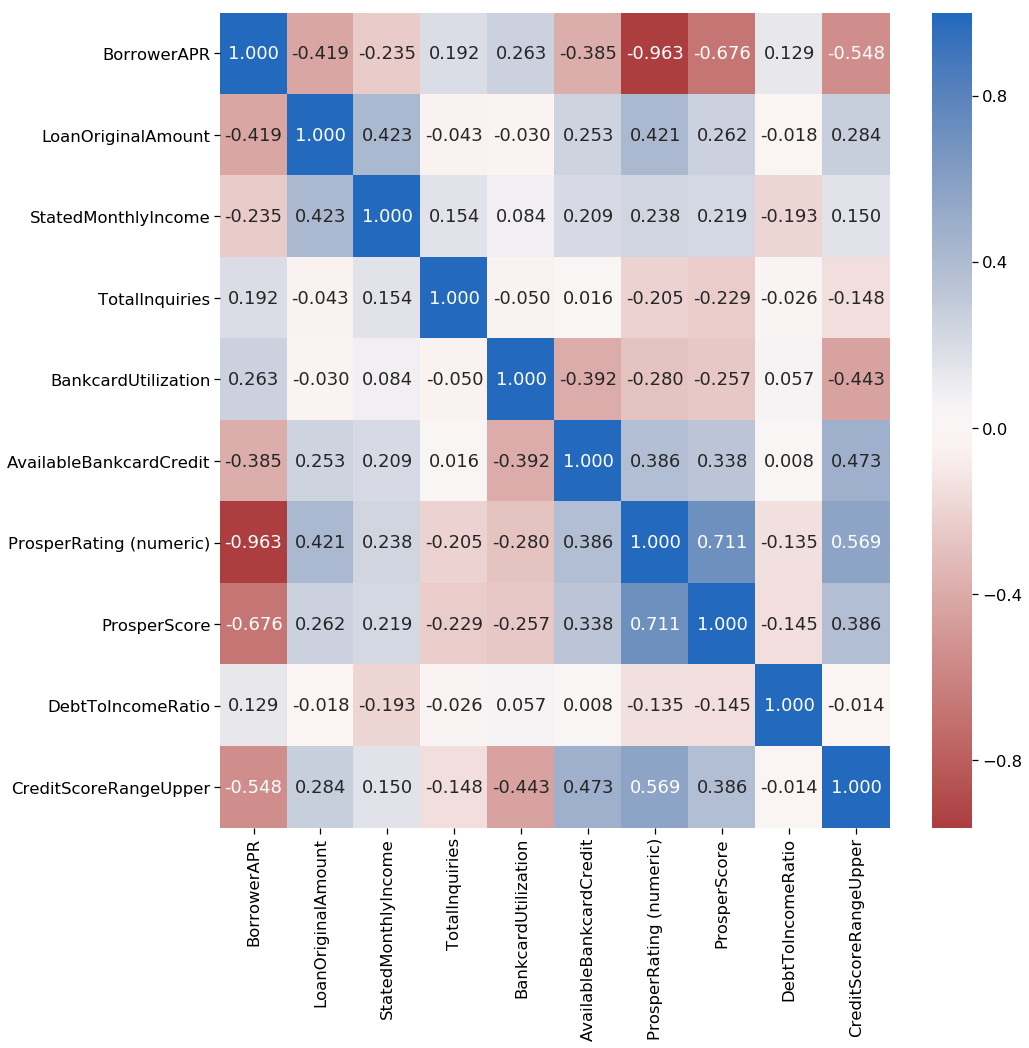

In [221]:
# correlation plot
plt.figure(figsize = [15,15])
sns.heatmap(df_2[plot_list].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

<br>

### Heatmap Observations

Based on the heatmap, we can conclude that 
1. Borrower APR is negatively correlated to the Prosper Rating and Credit Score
2. The loan amount is positively correlated to the Prosper Rating and Monthly Income

Let's investigate these two cases a little more deeply. 
<br>
<br>

### Linear Relationships 

__First I will look at the how the APR is affected by the Prosper Ratings and Credit Score__

1. I will use a combination of reg plots and scatter plot. 
2. I will also use semi-transparent data points due to the density of the data points to observe any correlations

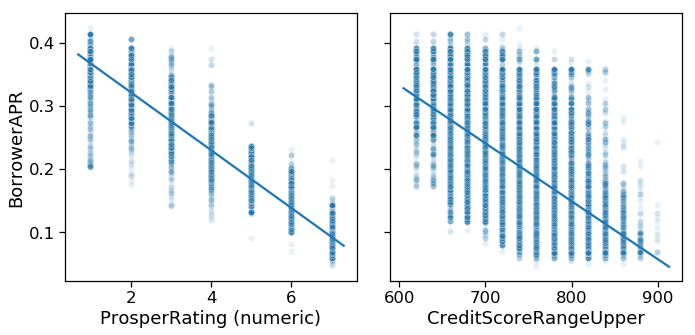

In [267]:
#Make Subplots
fig, axarr = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

#Use regplot and scatter plot to observe the presence of a linear relationship
sns.regplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], ax=axarr[0], scatter_kws={"s": 0});
sns.scatterplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], alpha = 0.1, ax=axarr[0]);
sns.regplot(x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], ax=axarr[1],scatter_kws={"s": 0});
sns.scatterplot(x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', data = df_2, alpha = 0.1,color = sns.color_palette()[0], ax=axarr[1]);
plt.tight_layout()

__APR observations__ 

From the plots above, it is clear that the APR is negatively correlated to the Prosper Rating and Credit Score. 

Although the Prosper Rating and CreditScores are not continuous data, they are still numerical values, and can be easily correlated to the APR to observe treads. 

__In this instance, it is very clear that the Prosper Score (determined from historic data) and Credit Score have a significant impact on the APR.__
<br>
<br>

__Loan Original Amount: Here I will investigate this as a function of Monthly Income, and Prosper Rating__

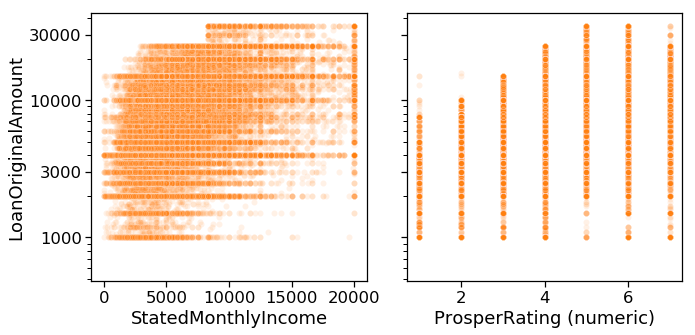

In [362]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

#sns.regplot(x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', data = df_2,color = sns.color_palette()[0], ax=axarr[0], scatter_kws={"s": 0});
sns.scatterplot(x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', data = df_2,color = sns.color_palette()[1], alpha = 0.1, ax=axarr[0]);
#sns.regplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,color = sns.color_palette()[0], ax=axarr[1],scatter_kws={"s": 0});
sns.scatterplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2, alpha = 0.1,color = sns.color_palette()[1], ax=axarr[1]);
plt.yscale('log')
plt.yticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.tight_layout()


__In this case, we see that both variables positively correlate to the Loan Amount__

### Boxplots APR

__Since the APR and loan amounts seem to be mostly related to categorial values, let's investigate the relationship using boxplots__

In [277]:
#Change credit score to type int, easier for plotting
df_2['CreditScoreRangeUpper'] = df_2['CreditScoreRangeUpper'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


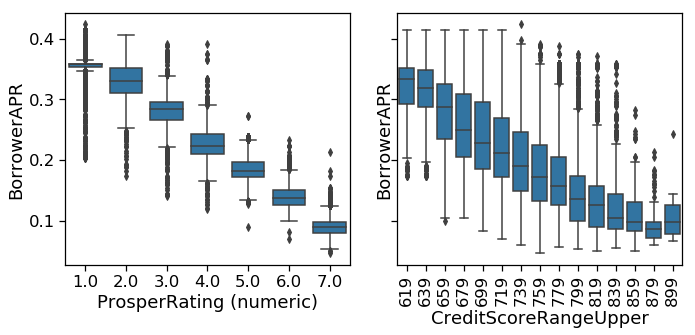

In [283]:
#Here we will replot the borrowerAPR using box plox against the Prosper Rating and Credit Score
fig, axarr = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

sns.boxplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], ax=axarr[0]);
sns.boxplot(x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], ax=axarr[1]);
plt.xticks(rotation=90);
plt.tight_layout()

__Based on these two plots of APR vs ProsperRating and CreditScore, the Linear Relationship is clear__

<br>
<br>

__Next we will examine how the Income Range, Loan Status, Employment Status and Propser Score affect the APR__

<br>

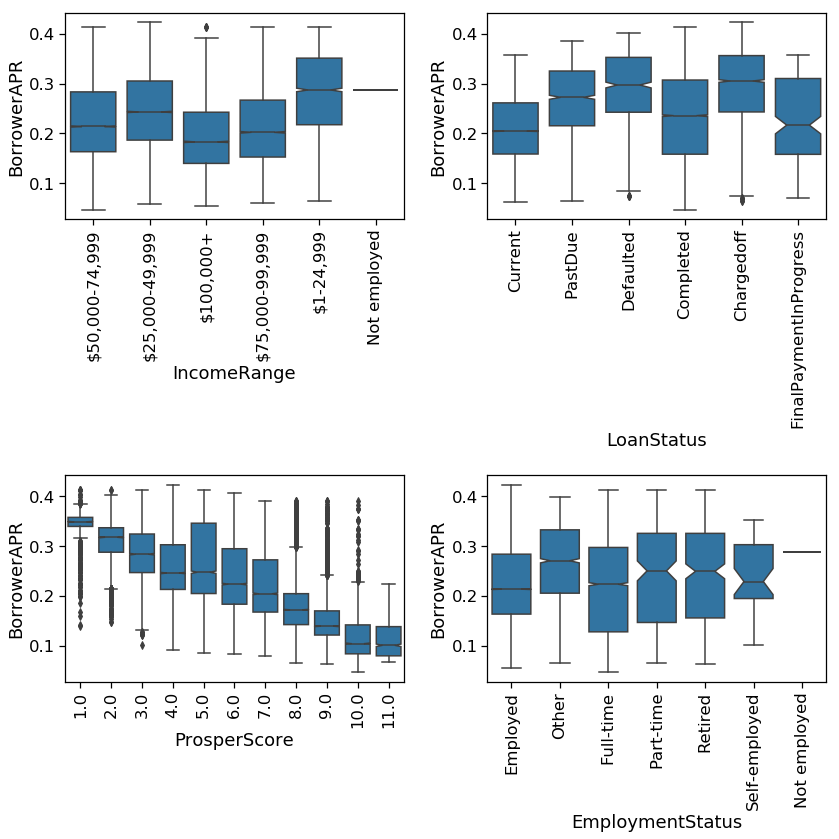

In [536]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

x_axis = [[df_2.IncomeRange, df_2.LoanStatus],[df_2.ProsperScore, df_2.EmploymentStatus]]

for i in range(2):
    for j in range(2):
        #plt.xticks(rotation=90);
        sns.boxplot(data = df_2, x = (x_axis[i][j]),y='BorrowerAPR', color = sns.color_palette()[0], notch = True, ax=axarr[i,j]);
        plt.sca(axarr[i,j])
        plt.xticks(rotation=90)
        plt.tight_layout()


__Observations__

1. ProsperScore: There is a clear dependence of APR on ProsperScore, but this is to be expected because we saw the same relationship in the correlation plot
2. Employment: No clear correlation between APR and employment status
3. Loan Status: Current, Completed and FinalPayment have lower APR, while past due have higher APR
4. Income Range: At first, it is hard to see, but the APR decreases with increasing income, we will replot this 

In [311]:
df_2.IncomeRange.unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

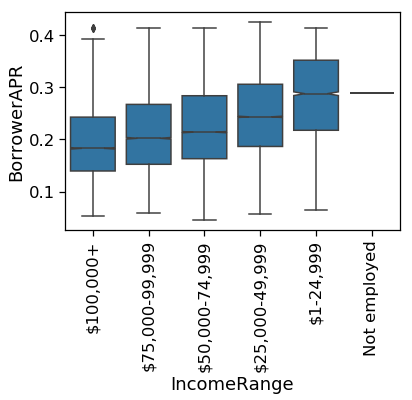

In [327]:
#Replot the Borrower APR vs Income range to have the income range sequentially
sns.boxplot(data = df_2, x = 'IncomeRange',y='BorrowerAPR', color = sns.color_palette()[0],notch = True, order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed']);
plt.xticks(rotation=90)

__Here the relationship between the APR and Income Range becomes clear and it shows that increased income leads to a lower APR__

### Boxplots for loan amount

__We will look at how the Income Range, Loan Status, Employment Status and Propser Score affect the Loan Amount__

__Data Transformation__
We will plot the loan amount on a log scale because the data has a long tail

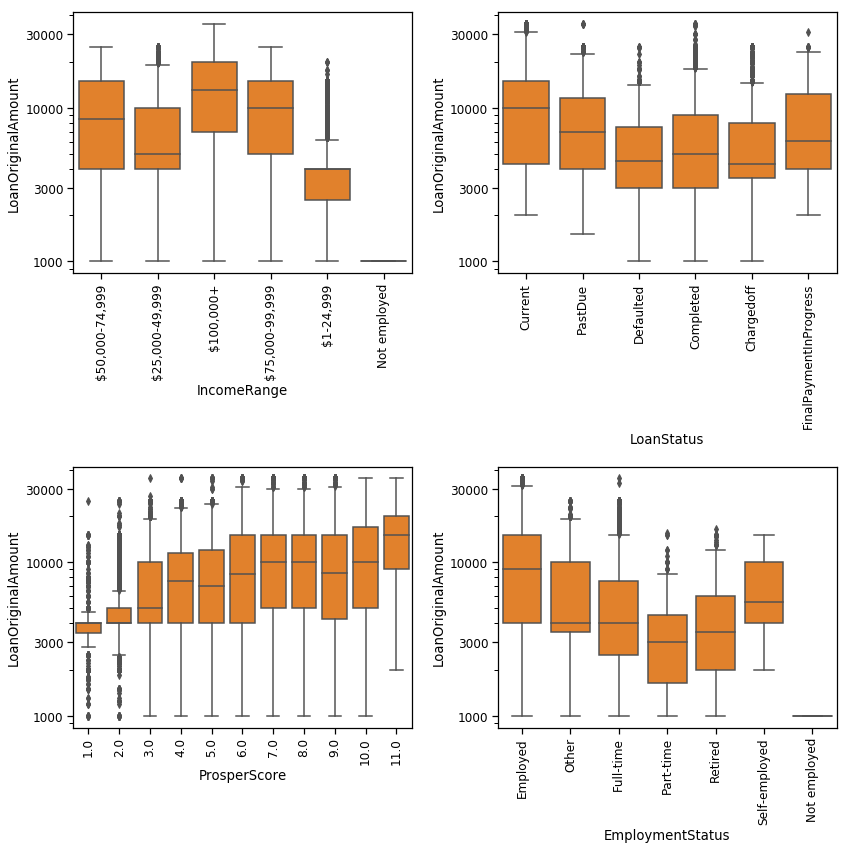

In [663]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

x_axis = [[df_2.IncomeRange, df_2.LoanStatus],[df_2.ProsperScore, df_2.EmploymentStatus]]

for i in range(2):
    for j in range(2):
        #plt.xticks(rotation=90);
        sns.boxplot(data = df_2, x = (x_axis[i][j]),y='LoanOriginalAmount', color = sns.color_palette()[1], ax=axarr[i,j]);
        plt.sca(axarr[i,j])
        plt.xticks(rotation=90)
        plt.yscale('log')#Plot the loan amount on a log scale to make the differences more apparent 
        plt.yticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
        plt.tight_layout()

__Observations__
1. Income range: Higher Income = Higher loan (plot needs to be sorted)
2. Loan Status: Defaulted loans have lower values
3. ProsperScore: Higher Score = Higher Loan
4. Employment: An employed person gets the highest loan amount. However, it is unclear why the full time (I assume, it's full time employed category) gets a lower amount. The not employed gets lowest loan

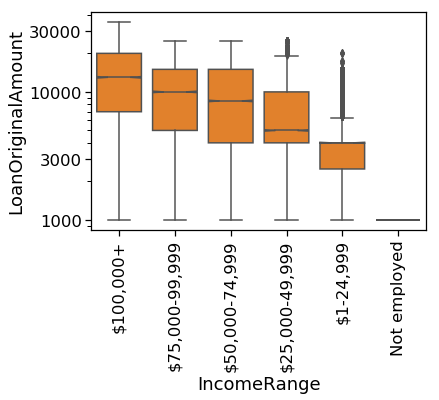

In [350]:
sns.boxplot(data = df_2, x = 'IncomeRange',y='LoanOriginalAmount', color = sns.color_palette()[1],notch = True, order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed']);
plt.xticks(rotation=90);
plt.yscale('log')#Plot the loan amount on a log scale to make the differences more apparent 
plt.yticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000]);


__We can clearly see that higher income leads to higher loans__

<br>
<br>

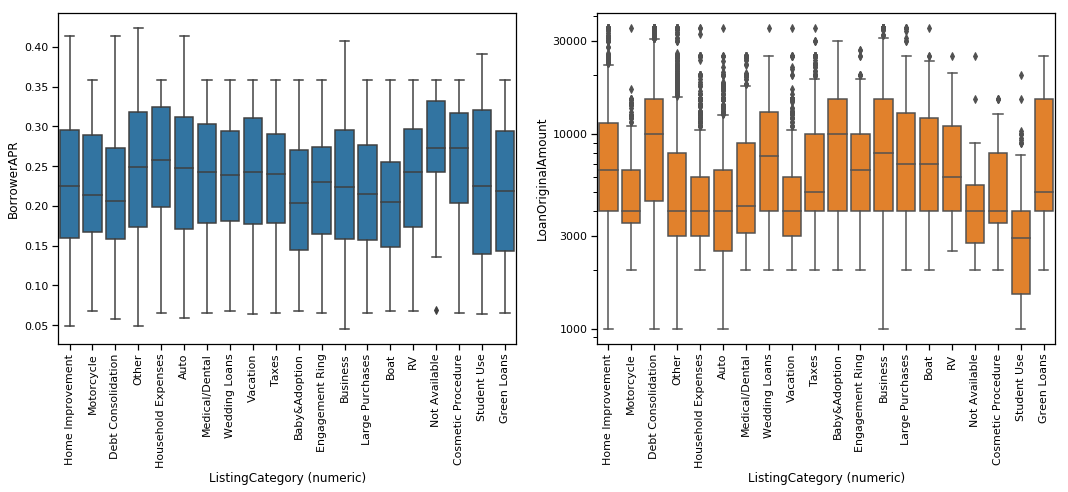

In [660]:
#Here we will replot the borrowerAPR using box plox against the Prosper Rating and Credit Score
fig, axarr = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(x = 'ListingCategory (numeric)', y = 'BorrowerAPR', data = df_2,color = sns.color_palette()[0], ax=axarr[0]);
sns.boxplot(x = 'ListingCategory (numeric)', y = 'LoanOriginalAmount', data = df_2,color = sns.color_palette()[1], ax=axarr[1]);
plt.sca(axarr[0])
plt.xticks(rotation=90)
plt.sca(axarr[1])
plt.xticks(rotation=90)
plt.yscale('log')#Plot the loan amount on a log scale to make the differences more apparent 
plt.yticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.tight_layout()

__Observations__
1. Most of the APR values are close to each other
2. The APR for auto purchase is really high compared to tradional auto purchase APR
3. The largest loan amount appears to be for Debt Consolidation and the smallest for student use

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The two variables that I am most intested in investingating are APR and Loan Amount, and understanding how other variables may affect this. A good way to get a good overview of this is to use the correlation map, and based on that I found that 
1. Borrower APR is negatively correlated to the Prosper Rating and Credit Score
2. The loan amount is positively correlated to the Prosper Rating and Monthly Income

> I invested these using scatter plots and box plot, and show that these relationships hold. 

> Moreover, I also found that the EmploymentStatus and IncomeRange also affect both APR and Loan Amount

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One of the most intersting observations came when looking at the categories of the loan and I found that the APR for auto purchase is really high compared to tradional auto purchase APR. 

## Multivariate Analysis

In this section I want to do a deeper dive into 

1. How the combination of (BorrowerAPR and ProsperRating)  and (LoanAmount and ProsperRating) vary with respect to other variables
2. How is the combination of Borrower APR and LoanAmount vary with categorical factors 

### How categorical variables effect BorrowerAPR for different prosperRatings

First I will explore BorrowerAPR vs ProsperRating as a function of 
1. Employment Status
2. LoanStatus
3. Year 
4. Term 

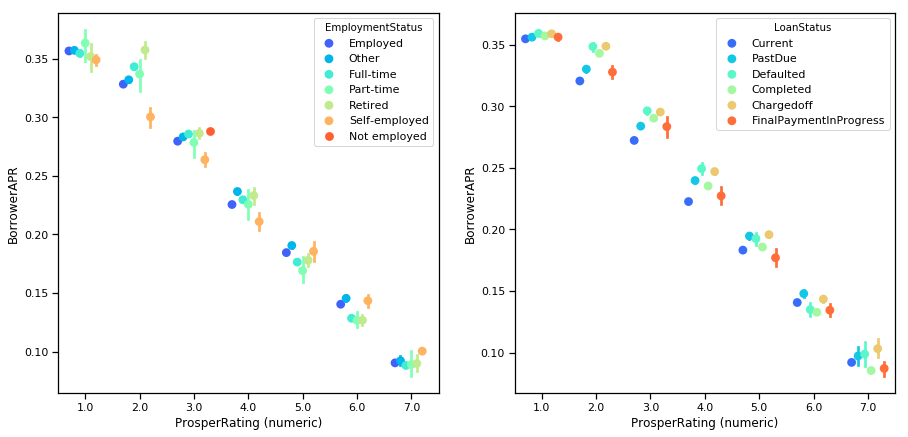

In [667]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 7))
sns.set_context("notebook", font_scale=1)
sns.pointplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,  hue ='EmploymentStatus',palette = "rainbow",linestyles = '', dodge = 0.6, ax=axarr[0] );
sns.pointplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,  hue ='LoanStatus',palette = "rainbow",linestyles = '', dodge = 0.6, ax=axarr[1] );


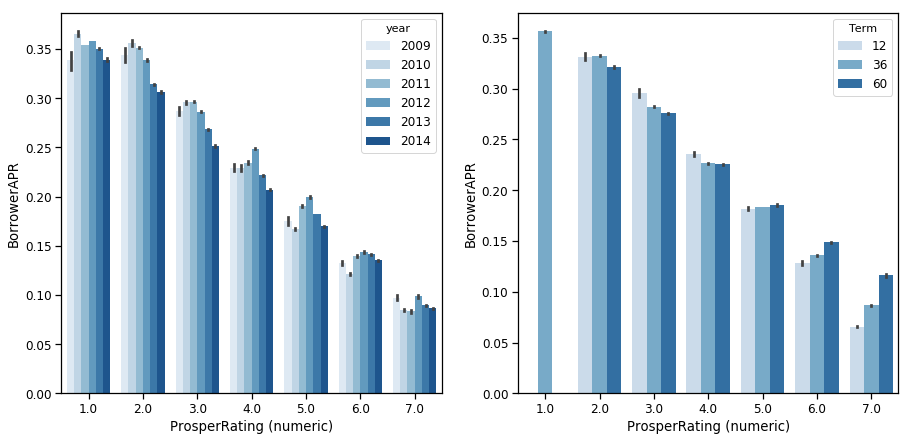

In [665]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 7))
sns.set_context("notebook", font_scale=1.1)
sns.barplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,  hue ='year',palette = "Blues", ax=axarr[0] );
sns.barplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,  hue ='Term',palette = "Blues", ax=axarr[1] );


__Observations__

1. Employment Status - We see that all the points denoting different employment types are clustered together. This shows that PropserRating has more impact than EmploymentType
2. LoanStatus - For Lower values of ProsperRating (4 or less), the current LoanStatus has a APR values, but at higher ProsperRatings, they are pretty closely clustered. We can conclude the LoanStatus can have a significant impact if the borrower has a lower ProsperRating 
3. Year - The APR for different ProsperRatings do not change over the years. 
4. Term - For higher ProsperRatings, a long term loan leads to a lower APR. 

### How categorical variables effect LoanAmount for different prosperRatings

__Next I will explore LoanOriginalAmount vs ProsperRating as a function of__ 
1. Employment Status
2. LoanStatus
3. Year 
4. Term 

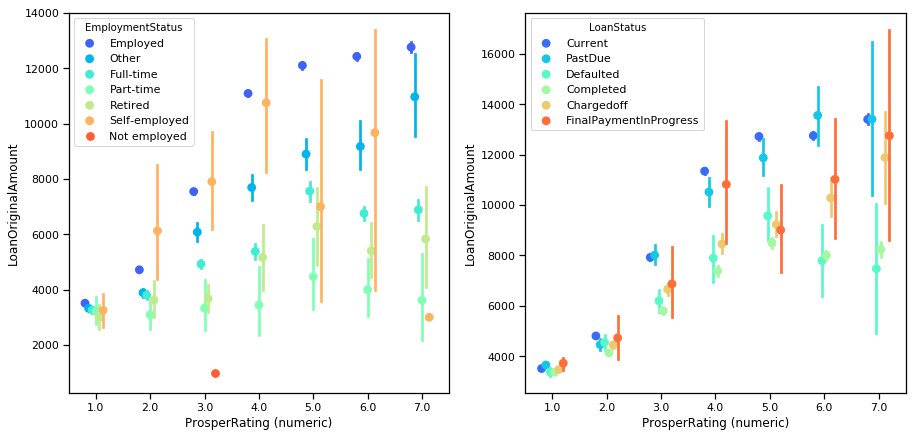

In [668]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 7))
sns.set_context("notebook", font_scale=1)
sns.pointplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,  hue ='EmploymentStatus',palette = "rainbow",linestyles = '', dodge = 0.4, ax=axarr[0] );
sns.pointplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,  hue ='LoanStatus',palette = "rainbow",linestyles = '', dodge = 0.4, ax=axarr[1] );


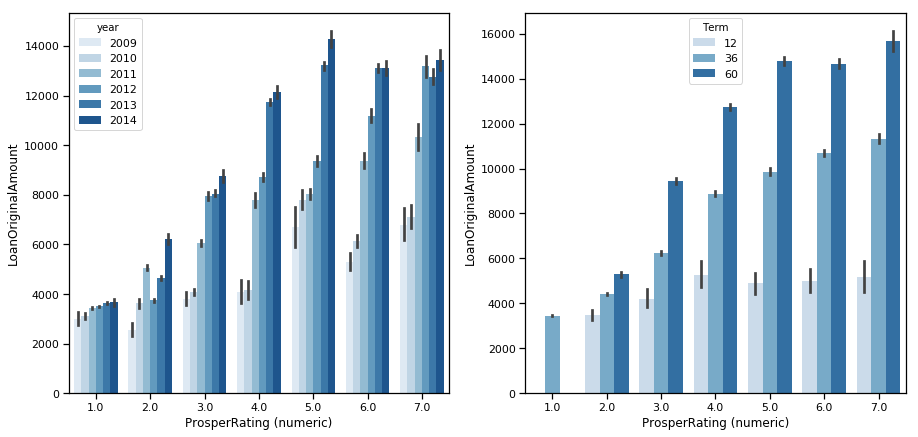

In [647]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 7))
sns.set_context("notebook", font_scale=1)
sns.barplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,  hue ='year',palette = "Blues", ax=axarr[0] );
sns.barplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,  hue ='Term',palette = "Blues", ax=axarr[1] );


__Observations__

1. Employment Status - There is a huge variation in the values, as seen by the large error bars, but one thing is clear that the employed borrowers are able the get the highest loans 
2. LoanStatus - Borrowers who are current with their loan payments have been able to get higher loan amounts than those who have defaulted or are past due. 
3. Year - The loan amount has been higher in the recent years, especially for ProsperRating 3.0 or higher
4. Term - Larget loan amounts are for longer terms. 

### Effect of IncomeRange on LoanOriginalAmount and BorrowerAPR vs ProsperRating

Next, I will look at how the IncomeRange of a borrower can affect the LoanOriginalAmount and BorrowerAPR vs ProsperRating, i.e. see how the IncomeRange can alter LoanOriginalAmount and BorrowerAPR for different ProsperScores. 

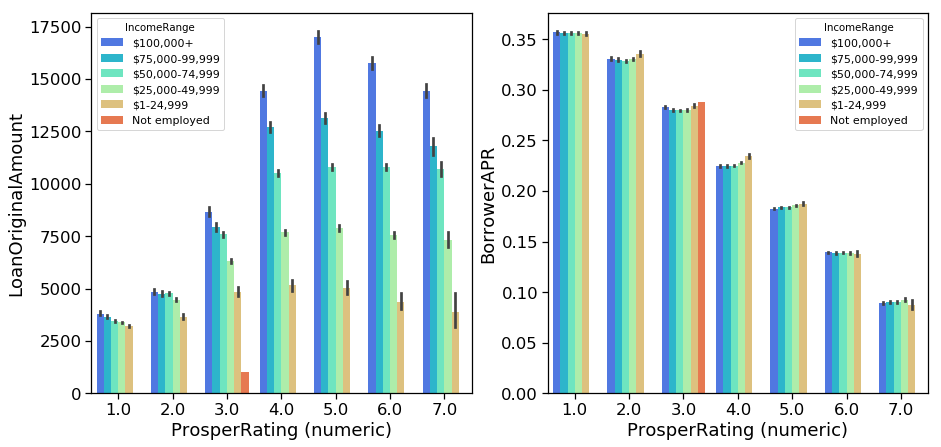

In [676]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 7))
sns.set_context("notebook", font_scale=1)
sns.barplot(x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', data = df_2,  hue ='IncomeRange',palette = "rainbow", ax=axarr[0], hue_order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed'] );
sns.barplot(x = 'ProsperRating (numeric)', y = 'BorrowerAPR', data = df_2,  hue ='IncomeRange',palette = "rainbow", ax=axarr[1],hue_order=['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', 
       '$1-24,999', 'Not employed']);

__Observerations__

1. LoanOriginalAmount: There is no real affect of IncomeRange on Loan amount for lower ProsperScores, but for scores higher than 4, higher loans are given to borrowers with larger Incomes 

2. The income range does not alter the APR for a given ProsperScore. 

### APR vs LoanAmount (two continuous numeric variables) multivariate analysis 

Till now we have looked at how APR and LoanAmount vary as a function of discrete numerical or categorical variables. 

Now, I will look at how two continuous variables APR, and Loan Amount after affected by discrete numerical or categorial variables. I will look at 

1. Year
2. ProsperRating
3. CreditScore
4. Term
5. Employment Status 

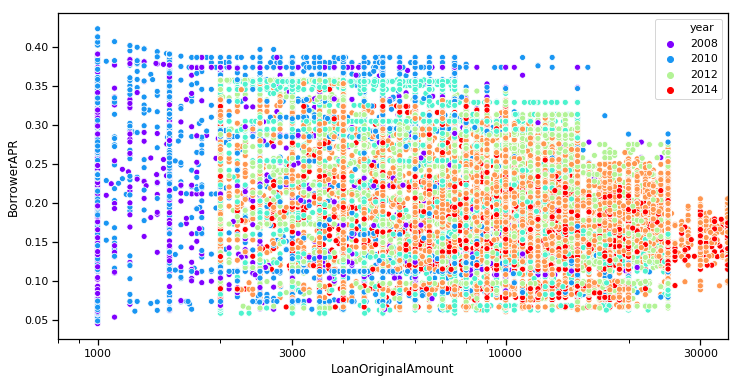

In [670]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=[12,6])
plt.xscale('log')
plt.xticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.xlim(800,35000)
sns.scatterplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = df_2,  hue ='year',palette = "rainbow" );
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

__Effect of Year on APR vs LoanAmount__ 

1. Here we see that loans made after 2012 are mostly greater than $2000 and all loans made before that are usually of lower value. 

2. A large fraction loans higher than 20K are made after 2010. 

__Next I will look at how the ProsperRating affects this relationship__



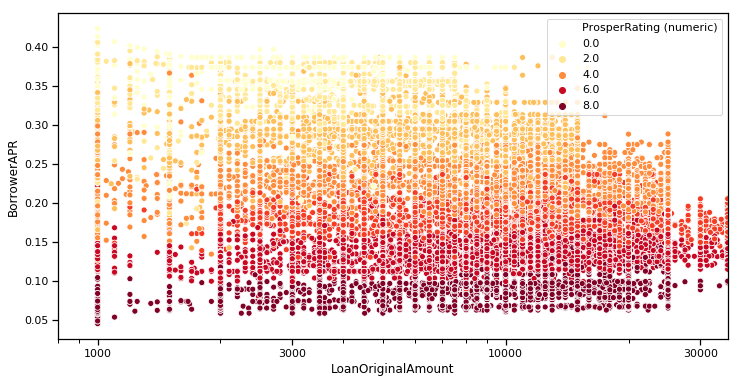

In [646]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=[12,6])
plt.xscale('log')
plt.xticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.xlim(800,35000)
sns.scatterplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = df_2,  hue ='ProsperRating (numeric)',palette = "YlOrRd"  );
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

__Effect of ProsperRating on APR vs LoanAmount__

1. There is a clear gradient of the rating vs APR, and we see that the lowest APRs are associated with the highest ratings. 

2. The loans > $22000 are almost all have higher than 6.0 prosperRating and a low APR. 


__Next I will look at the MonthlyPayments__

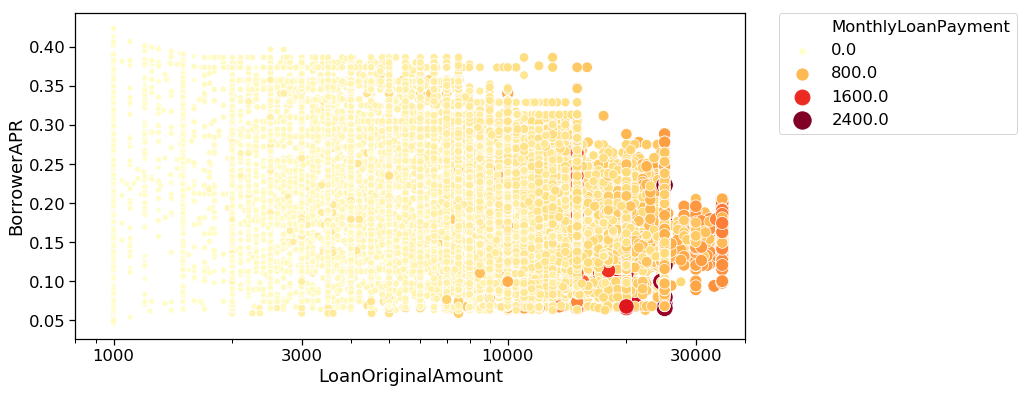

In [582]:

sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=[12,6])
plt.xscale('log')
plt.xticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.xlim(800,40000)
sns.scatterplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = df_2,  hue ='MonthlyLoanPayment',size ='MonthlyLoanPayment',sizes=(30, 300),palette = "YlOrRd" );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



__Observations__ 

We see that the Monthly payments are most directly correlated to the amount borrowed

__Next I will look at how the CreditScore effects this relationship__

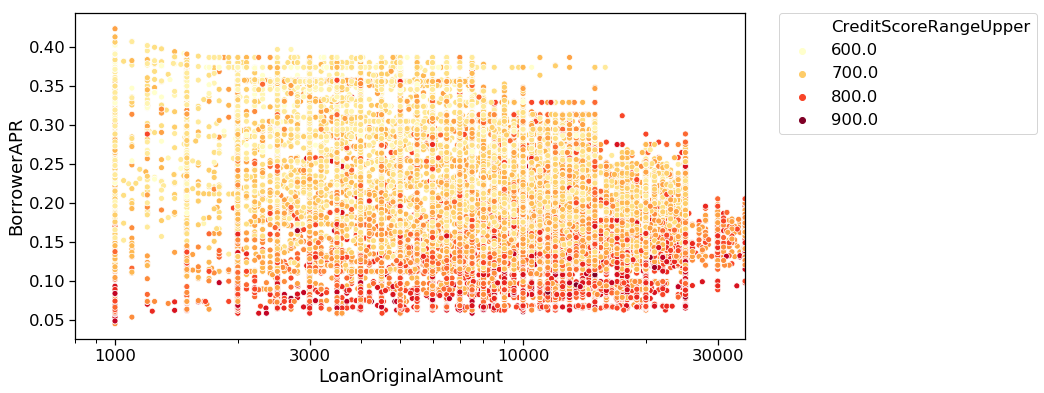

In [575]:
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=[12,6])
plt.xscale('log')
plt.xticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.xlim(800,35000)
sns.scatterplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = df_2,  hue ='CreditScoreRangeUpper', palette = "YlOrRd" );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

__Observations__

The credit score has a similar effect as the ProsperRating, and this is to be expected, because they are highly correlated. 

1. A higher CreditScore results in a lowerAPR. 

2. The highest LoanAmounts also generally have a high credit rating. 

<br>

__Next I will look at the effect of Term on this relationship__

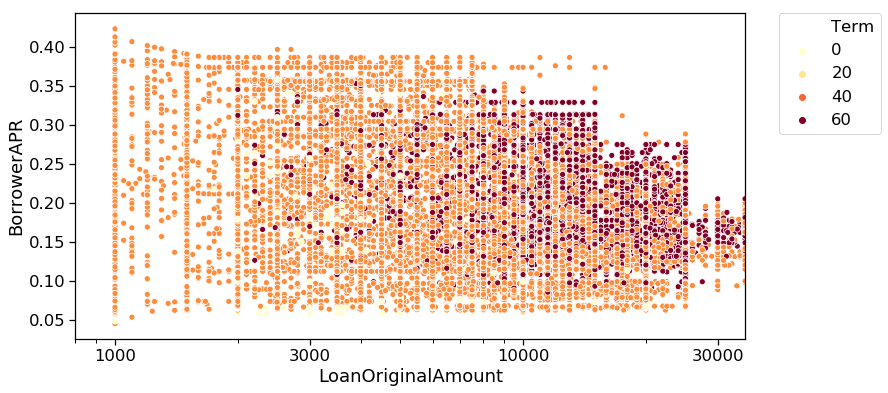

In [671]:
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=[12,6])
plt.xscale('log')
plt.xticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.xlim(800,35000)
sns.scatterplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = df_2,  hue ='Term',palette = "YlOrRd" );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

__Observation__

While the LoanTerm has a clear effect on the LoanAmount, higher terms for higher amounts, there is no clear relationship with the APR
<br>
<br>

__Next we look at IncomeRange__

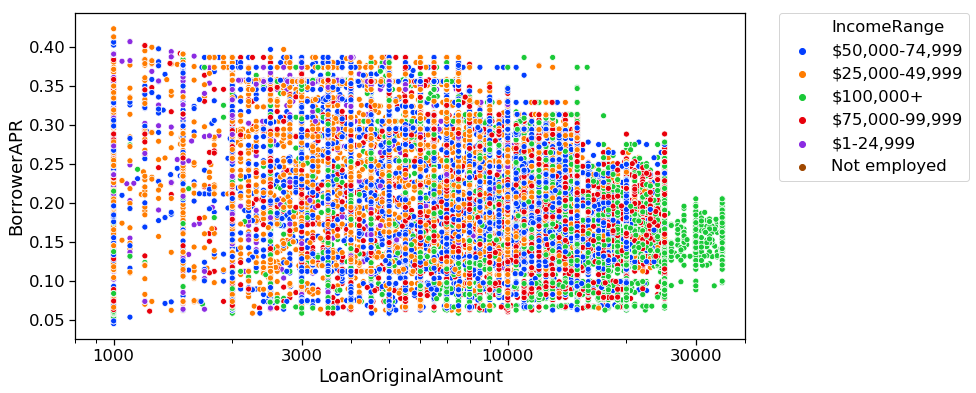

In [672]:
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=[12,6])
plt.xscale('log')
plt.xticks([ 1e3, 3e3, 1e4, 3e4], [ 1000, 3000, 10000, 30000])
plt.xlim(800,40000)
sns.scatterplot(x = 'LoanOriginalAmount', y = 'BorrowerAPR', data = df_2,  hue ='IncomeRange',palette = "bright" );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

__Observations__

To obtain a loan of >22k, one has to have an income of >100k

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I investigate how the LoanAPR and LoanAmount after affected by other categorial and numerical values. The ProsperScore is the single most important factor in determining the LoanAPR

> The LoanAmount not only impacted by the ProsperScore, but also by the IncomeRange and the LoanTerm. 

> As we saw from the correlation table, the ProsperScore is closely related to the CreditRating, and we see that the CreditRating has a similar effect on the LoanAPR. 

### Were there any interesting or surprising interactions between features?

> The most interesting interaction was that of the ProsperRating vs the LoanAmount, and how different variables effected this interaction. For example if we look at the IncomeRange, for a ProsperRating < 3, no matter what the income of the borrower was, there the loanAmount was very low, but for ProsperRating >3, a higher IncomeRange resulted in a higher loan amount. However, this was not the case with the APR, and they were pretty stable across the IncomeRange for different ProsperRatings. 